# Interactive basis plaything

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib notebook

from madminer.morphing import MadMorpher

## Settings

In [2]:
n_bases = 1
n_resolution = 50

n_frames = 200

## Preparation

In [26]:
morpher = MadMorpher(parameter_max_power=[4,4],
                     parameter_range=[(-1.,1.), (-1.,1.)],
                     max_overall_power=4,
                     n_bases=n_bases)

In [27]:
xi = np.linspace(-1.,1.,n_resolution)
yi = np.linspace(-1.,1.,n_resolution)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_evaluation = np.hstack([xx, yy])

## Basis evaluation

In [28]:
def evaluate_basis(basis=None):
    
    # Optimization
    if basis is None:
        basis = morpher.find_basis_simple()

    # Evaluate basis
    squared_weights = []

    for theta in theta_evaluation:
        wi = morpher._calculate_morphing_weights(theta, basis)
        squared_weights.append(np.sum(wi*wi)**0.5)

    squared_weights = np.array(squared_weights).reshape((n_resolution,n_resolution))
    
    return squared_weights

## Trajectories

In [110]:
theta_min = np.array([[ 0.        ,  0.        ],
       [-0.8318245 ,  0.85645093],
       [-0.82002127, -0.85191237],
       [ 0.76870769, -0.81272456],
       [ 0.7819962 ,  0.86242685],
       [-0.57243257,  0.37755934],
       [-0.29730939,  0.74563426],
       [ 0.13777926,  0.35254704],
       [ 0.46330191,  0.51783982],
       [ 0.64649576, -0.01232633],
       [ 0.16629182, -0.29365045],
       [ 0.39752054, -0.64235507],
       [-0.19238158, -0.59962178],
       [-0.30730345, -0.09697784],
       [-0.70631846, -0.18913046]])

random_points = -1. + 2.*np.random.rand(morpher.n_benchmarks,2)
random_weights = 0.6 * np.random.rand(morpher.n_benchmarks,2)
theta_max = (1.-random_weights) * (theta_min ) + random_weights*random_points
theta_phase = 2.*np.pi*np.random.rand(morpher.n_benchmarks,2)

In [111]:
def calculate_basis(t):
    basis = 0.5 * (
        (theta_max + theta_min)
        + (theta_max - theta_min)
        * np.sin(2.*np.pi * t / n_frames + theta_phase)
    )
    return basis

## Initial configuration

In [112]:
basis = calculate_basis(0)

squared_weights = evaluate_basis(basis)

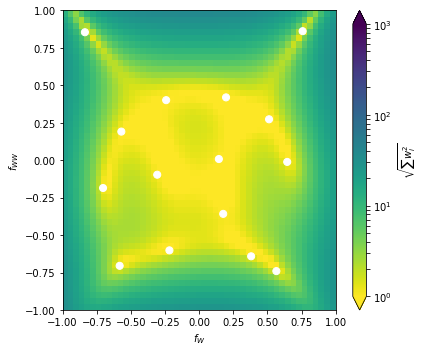

In [113]:
fig = plt.figure(figsize=(6.,5.))
ax = plt.gca()

colors = []
for c in ['white', 'black', 'yellow', 'green', 'blue', 'red'][:morpher.n_bases]:
    colors += [c] * morpher.n_components

pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1000.),
                   cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

scatter = plt.scatter(basis[:,0], basis[:,1], s=50., c=colors)

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

plt.tight_layout()
plt.show()

## Animation

In [114]:
def update(t):
    basis = calculate_basis(t)
    squared_weights = evaluate_basis(basis)
    
    print(t)
    
    scatter.set_offsets(basis)
    pcm.set_array(squared_weights[:-1,:-1].ravel())
    

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0


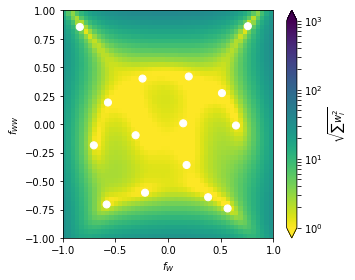

In [115]:
fig = plt.figure(figsize=(5.,4.))
ax = plt.gca()

colors = []
for c in ['white', 'black', 'yellow', 'green', 'blue', 'red'][:morpher.n_bases]:
    colors += [c] * morpher.n_components

pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1000.),
                   cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

scatter = plt.scatter(basis[:,0], basis[:,1], s=50., c=colors)

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

plt.tight_layout()

anim = FuncAnimation(fig, update, frames=np.arange(0, n_frames), interval=40)
anim.save('test.gif', dpi=150, writer='imagemagick')
